# Homework 01 - ASTROSTATISTICS

### Larissa Fagundes Pereira

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats # essa eu não conhecia, descobri pesquisando para fazer a lista
import pandas as pd
from scipy.optimize import curve_fit
from scipy.optimize import minimize

1) Take a normal distribution with mean equals to 20 and variance equals to 10, i.e.,
N (20, √ 10). Produce N samples with 8 data points each assuming such a distribution, and
prove the central limit theorem using those samples.

In [ ]:
# Dados do enunciado:
media = 20
variancia = 10
desvio_padrao = np.sqrt(variancia)
data_points = 8

In [ ]:
# pensei em colocar numa função para gerar N amostras aleatórias e comparar para diferentes valores:

def samples(N):
  return np.random.normal(media, desvio_padrao, size=(N, data_points))

In [ ]:
# testando no teorema do limite central (tlc) e plotando:

def samples_plot(N):
  sample = samples(N)

  #calcular a média da quantidade de amostras que se quer calcular e fazer histograma dessas média:
  media_samples = np.mean(sample, axis=1, keepdims=False)

  plt.hist(media_samples, bins=50, density=True, alpha=0.5, color='b', label='Média das amostras')

  xmin, xmax = plt.xlim() #preparando o eixo x para a curva a ser ajustada
  x = np.linspace(xmin, xmax, 100)

  erro_padrao = desvio_padrao / np.sqrt(data_points) # calculo do erro-padrão

  # calculando a função de densidade de probabilidade (pdf), também chamada de verissimilhança, para criar a curva teórica e comparar:
  p = stats.norm.pdf(x, media, erro_padrao) # espero que isso faça sentido

  plt.plot(x, p, 'r--', linewidth=1.5, label='Distribuição Normal')
  plt.legend()
  return plt.show()

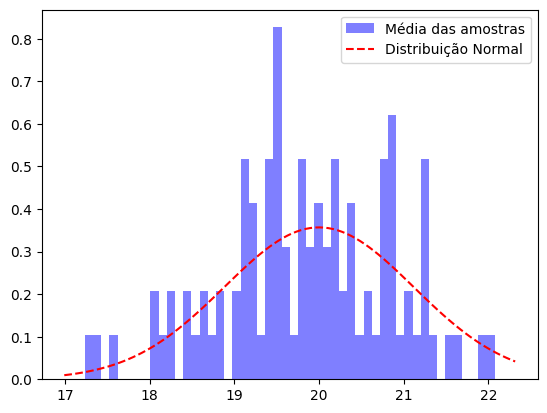

In [ ]:
# Para 100 amostras:
samples_plot(100)

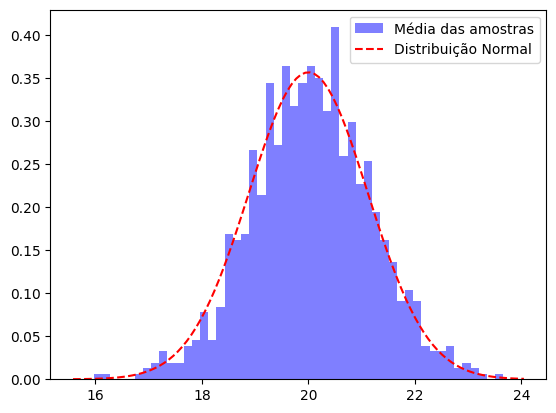

In [ ]:
# Para 1000 amostras:
samples_plot(1000)

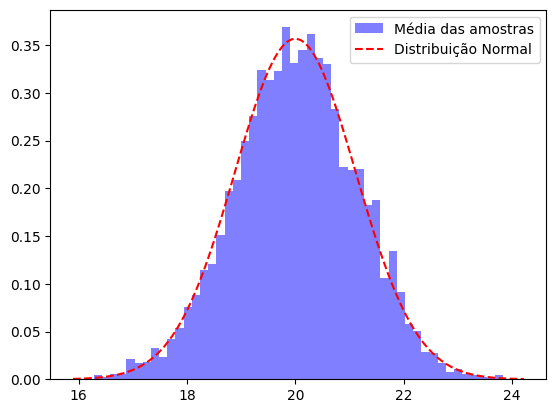

In [ ]:
# Para 5000 amostras:
samples_plot(5000)

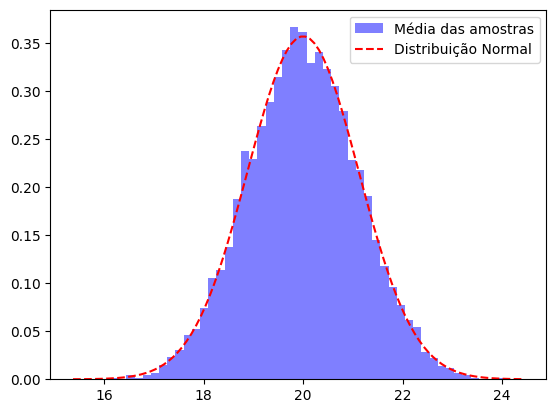

In [ ]:
# Para 10000 amostras:
samples_plot(10000)

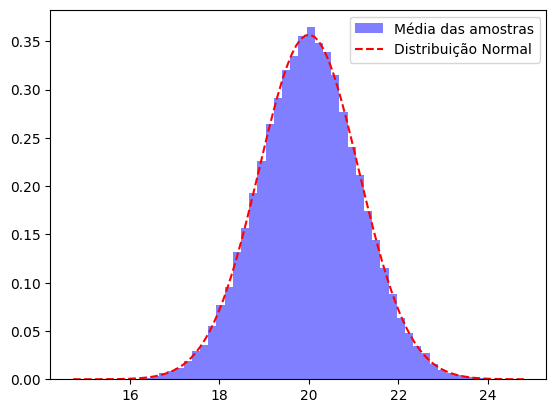

In [ ]:
# Para 50000 amostras:
samples_plot(50000)

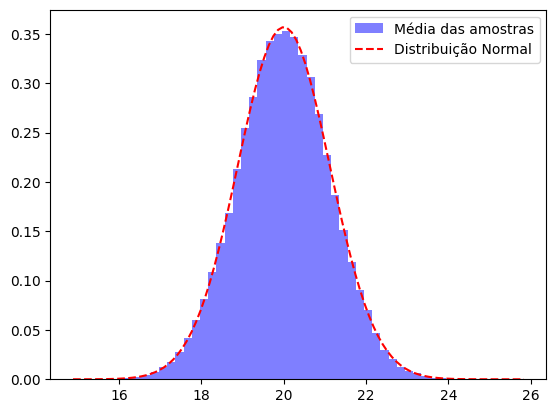

In [ ]:
# Para 100000 amostras:
samples_plot(100000)

Segundo o teorema do limite central, a distribuição amostral tende a se aproximar de uma distribuição normal conforme o tamanho da amostra cresce.

Analisando os gráficos acima, podemos perceber que isso ocorre conforme o valor de N aumenta. Pois a média das amostras se aproxima de uma gaussiana.

## 2. Consider the galaxy cluster catalogues named WHL12-2015updated and WH15-rich.dat.

a) Plot a histogram of the redshift distribution of the objects in both catalogues – fourth column from left to right. State what is the bin width assumed in these plots.

In [ ]:
WHL12 = pd.read_csv('/content/drive/MyDrive/Astroestatística/HOMEWORK/WHL12_2015updated.txt', sep = '\s+')
WH15 = pd.read_csv('/content/drive/MyDrive/Astroestatística/HOMEWORK/WH15_rich.txt', sep = '\s+')
WHL12.head()

,WHL,Name,RAdeg,DEdeg,zphot,zspec,rmag,r200,RL*,N200,r500,RL*500,N500sp,N500
0,WHL,J000000.6+321233,0.00236,32.20925,0.1274,-1.0000,14.92,1.72,70.63,24,1.01,68.28,0,19
1,WHL,J000002.3+051718,0.00957,5.28827,0.1696,0.1694,16.20,0.94,17.48,9,0.72,24.46,1,9
2,WHL,J000003.1-033245*,0.01276,-3.54578,0.5968,0.5973,20.14,1.00,19.19,11,0.83,49.33,2,13
3,WHL,J000003.3+311354,0.01377,31.23175,0.5428,0.5293,20.17,0.87,14.27,8,0.63,25.43,2,9
4,WHL,J000003.5+314708,0.01475,31.78564,0.0932,0.0916,15.18,0.94,16.97,9,0.69,21.14,1,11


In [ ]:
WH15.head()
#eu editei os catálogos antes de colocar no google drive

,WH,Name,RAdeg,DEdeg,zspec,rmag,r500,RL*500,N500sp,N500
0,WH,J000004.2+021941,0.01743,2.32800,0.6443,20.15,0.69,27.88,1,6
1,WH,J000004.3-091120,0.01809,-9.18902,0.6028,19.95,0.70,34.93,1,7
2,WH,J000005.9+100144,0.02452,10.02896,0.6712,20.46,0.65,27.84,1,6
3,WH,J000006.8+195244,0.02824,19.87897,0.4771,19.88,0.62,22.75,2,7
4,WH,J000007.7+234443,0.03208,23.74541,0.5285,19.84,0.65,27.25,2,7


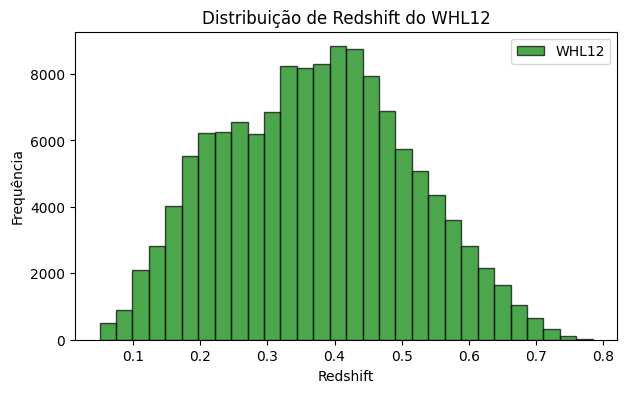

In [ ]:
# histograma do WHL12:
plt.figure(figsize=(7, 4))
valores_hist12, bins_12, patches_12 = plt.hist(WHL12['zphot'], bins=30, alpha=0.7, color='green', edgecolor = 'black', label='WHL12')
plt.title('Distribuição de Redshift do WHL12')
plt.xlabel('Redshift')
plt.ylabel('Frequência')
plt.legend()
plt.show()

In [ ]:
bin_width12 = bins_12[1] - bins_12[0]
print(f'Largura do Bin para o WHL12: {bin_width12}')

Largura do Bin para o WHL12: 0.02448666666666667


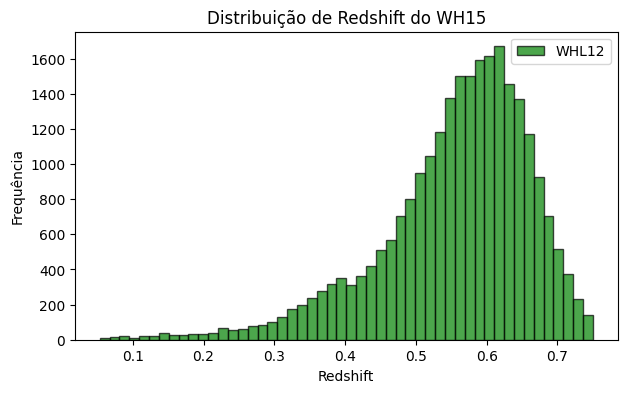

In [ ]:
# histograma do WH15:
plt.figure(figsize=(7, 4))
valores_hist15, bins_15, patches_15 = plt.hist(WH15['zspec'], bins=50, alpha=0.7, color='green', edgecolor = 'black', label='WHL12')
plt.title('Distribuição de Redshift do WH15')
plt.xlabel('Redshift')
plt.ylabel('Frequência')
plt.legend()
plt.show()

In [ ]:
bin_width15 = bins_15[1] - bins_15[0]
print(f'Largura do Bin para o WHL12: {bin_width12}')

Largura do Bin para o WHL12: 0.02448666666666667


b) Fit a Gaussian curve over those histograms. What is the mean, variance and higher order momenta (skewness and kurtosis) obtained for each case? Tip: You can use python fitting routines to perform this procedure.

In [ ]:
#função da gaussiana:
def gauss(x, amp, mean, sigma):
    return amp * np.exp(-(x - mean)**2 /2*(sigma)**2)

In [ ]:
redshift12 = WHL12['zphot']
redshift15 = WH15['zspec']

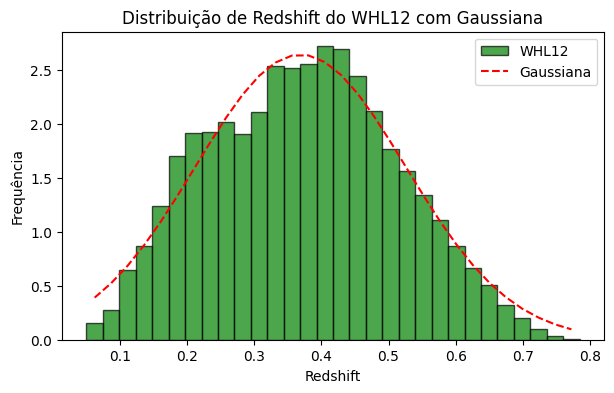

In [ ]:
# Refazendo o plot, agora com a gaussiana: (não consegui fazer função pra esse plot pq deu erro na legenda)
plt.figure(figsize=(7, 4))
valores_hist12b, bins_12b, patches_12b = plt.hist(redshift12, bins=30, alpha=0.7, density=True, color='green', edgecolor = 'black', label='WHL12')

# encontrar os centros dos bins para usa-los como pontos médios no eixo x e ajustar a gaussiana
centro_bin12 = (bins_12b[:-1] + bins_12b[1:]) / 2

# usar o curve fit para ajustar a gaussiana e plotar:
parametros_12, erro_12 = curve_fit(gauss, centro_bin12, valores_hist12b, p0=[1, np.mean(redshift12), np.std(redshift12)])

amp, mean, sigma = parametros_12

curva = gauss(centro_bin12, *parametros_12)

plt.plot(centro_bin12, curva, 'r--', label='Gaussiana')

plt.title('Distribuição de Redshift do WHL12 com Gaussiana')
plt.xlabel('Redshift')
plt.ylabel('Frequência')
plt.legend()
plt.show()

In [ ]:
#Obtendo a média, a variancia, a assimetria e a curtose
skewness12 = redshift12.skew()
kurtosis12 = redshift12.kurtosis()
print(f'''mean = {parametros_12[1]}
variance = {parametros_12[2]**2}
skewness = {skewness12}
kurtosis = {kurtosis12}''')

mean = 0.3688907708593619
variance = 40.678750667402035
skewness = 0.08683428822450048
kurtosis = -0.6256044347085634


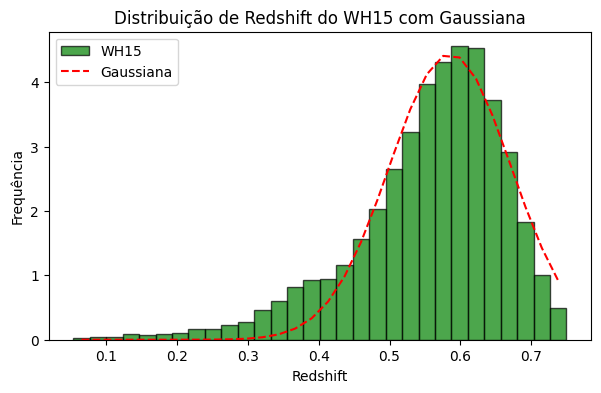

In [ ]:
# para o WH15:
plt.figure(figsize=(7, 4))
valores_hist15b, bins_15b, patches_15b = plt.hist(redshift15, bins=30, alpha=0.7, density=True, color='green', edgecolor = 'black', label='WH15')

centro_bin15 = (bins_15b[:-1] + bins_15b[1:]) / 2

parametros15, erro15 = curve_fit(gauss, centro_bin15, valores_hist15b, p0=[1, np.mean(redshift15), np.std(redshift15)])

amp15, mean15, sigma15 = parametros15

curva = gauss(centro_bin15, *parametros15)

plt.plot(centro_bin15, curva, 'r--', label='Gaussiana')

plt.title('Distribuição de Redshift do WH15 com Gaussiana')
plt.xlabel('Redshift')
plt.ylabel('Frequência')
plt.legend()
plt.show()

In [ ]:
#Obtendo a média, a variancia, a assimetria e a curtose para o WH15
skewness15 = redshift15.skew()
kurtosis15 = redshift15.kurtosis()
print(f'''mean = {parametros15[1]}
variance = {parametros15[2]**2}
skewness = {skewness15}
kurtosis = {kurtosis15}''')

mean = 0.5856622361644711
variance = 135.40034021816746
skewness = -1.1357699206022729
kurtosis = 1.77691920731441


3) Consider the cosmic chronometer measurements, namely H(z), in the data file hz.dat. Each column (left to right) represent the redshift (z), Hubble expansion rate (H(z)), its corresponding uncertainty (σH(z)), while the last column can be neglected for the time being. Also consider that, in the standard cosmological model paradigm (flat ΛCDM), the Hubble expansion rate is given by
# H(z) = H0(Ωm(1 + z)^3 + (1 − Ωm))^1/2

hence, H0 denotes the Hubble Constant, and Ωm consists on the total matter density parameter of the Universe. In other words, these are the free parameters that describe our model.

#### **a) An estimate of the H0 best fit value using the cosmological model and data provided, i.e., the parameter value that best represents the data using the maximum likelihood method through χ2 minimisation. Fix Ωm to Ωm = 0.20, 0.30, and 0.40, and compare the results obtained for each case.**

In [ ]:
# importando o hz.dat, que já foi editado de acordo com as colunas:
hz_dados = pd.read_csv('/content/drive/MyDrive/Astroestatística/HOMEWORK/hz.dat', sep = '\s+')
hz_dados.head()

,redshift,H(z),σH(z),neglected
0,0.070,69.0,19.6,1.0
1,0.090,69.0,12.0,1.0
2,0.120,68.6,26.2,1.0
3,0.170,83.0,8.0,1.0
4,0.179,75.0,4.0,1.0


In [ ]:
# definindo a função para a taxa de expansão de Hubble:
def Hexp(z, H0, omega):
  Hz = H0 * np.sqrt(omega * (1 + z)**3 + (1 - omega))
  return Hz

In [ ]:
# definindo função para minimização de qui quadrado:
def qui_quad(H0, z, hz, sigma_hz, omega_m):
  Hz_teorico = Hexp(z, H0, omega_m)
  qui2 = np.sum(((hz - Hz_teorico) / sigma_hz)**2)
  return qui2

In [ ]:
omega_valores = [0.2, 0.3, 0.4]
z = hz_dados['redshift']
Hz_obs = hz_dados['H(z)']
desvio_Hz = hz_dados['σH(z)']

In [ ]:
best_fit_H0 = []

In [ ]:
for i in omega_valores:
  H0_inicial = 69.0 # o primeiro valor de hz.dat
  minim = minimize(qui_quad, H0_inicial, args=(z, Hz_obs, desvio_Hz, i))
  best_H0 = minim.x[0]
  print(f'omega = {i}')
  print(f'H0 best fit: {best_H0}')
  print('----------------------')

  best_fit_H0.append(best_H0)

omega = 0.2
H0 best fit: 74.65104018345602
----------------------
omega = 0.3
H0 best fit: 68.35450708623229
----------------------
omega = 0.4
H0 best fit: 63.353260824509185
----------------------


Quanto maior o omega m, menor se torna o "best fit".

### **b) A plot of the H0 likelihood for each case**

In [ ]:
# likelihood: L=e^(−χ**2 / 2)
def veross(qui2):
  Likelh = np.exp(-qui2 / 2)
  return Likelh

In [ ]:
# definindo função para o plot:
def plot_veros(H0, z, Hz, desvio, Omega):
  Like = []
  for i in H0:
    x = veross(qui_quad(i, z, Hz, desvio, Omega))
    Like.append(x)

  plt.figure(figsize=(5, 3))

  plt.plot(H0, Like, 'purple')

  plt.xlabel('$H_0$')
  plt.ylabel('Likelihood')
  plt.title(f'Verossimilhança (likelihood) com $\Omega_m = {Omega}$')
  return plt.show()

In [ ]:
# colocando o H0 em uma faixa de valores entre 55 e 85
H_zero = np.linspace(55,85,1000)
# relembrando:
omega_valores = [0.2, 0.3, 0.4]
z = hz_dados['redshift']
Hz_obs = hz_dados['H(z)']
desvio_Hz = hz_dados['σH(z)']

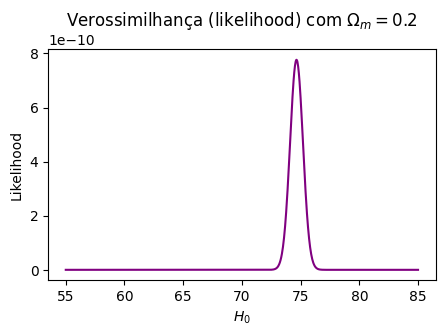

In [ ]:
#omega = 0.2
plot_veros(H_zero, z, Hz_obs, desvio_Hz, omega_valores[0])

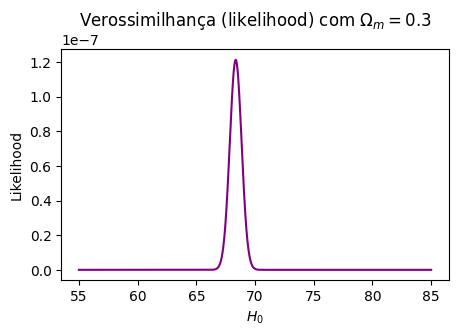

In [ ]:
#omega = 0.3
plot_veros(H_zero, z, Hz_obs, desvio_Hz, omega_valores[1])

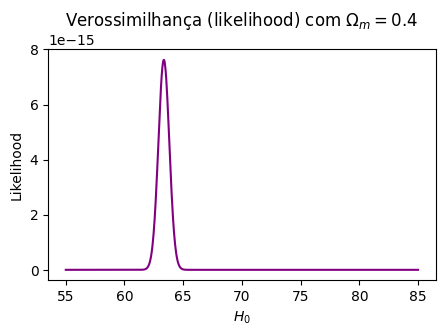

In [ ]:
#omega = 0.4
plot_veros(H_zero, z, Hz_obs, desvio_Hz, omega_valores[2])

### **c) The χ2 values at their best fits, as well as the χ2nu. Given the values obtained for the latter quantity, what is the Ωm value that gives the best estimate among all? Explain.**

In [ ]:
qui_quad_fits = []

In [ ]:
for j in range(3):
  h0 = best_fit_H0[j]
  omegaj = omega_valores[j]
  quiquad_best = qui_quad(h0, z, Hz_obs, desvio_Hz, omegaj)

  qui_quad_fits.append(quiquad_best)

  print(f'omega = {omegaj}')
  print(f'qui2 no "best fit": {quiquad_best}')
  print('--'*30)

omega = 0.2
qui2 no "best fit": 41.952379377770924
------------------------------------------------------------
omega = 0.3
qui2 no "best fit": 31.85053933068701
------------------------------------------------------------
omega = 0.4
qui2 no "best fit": 65.0152013588913
------------------------------------------------------------


In [ ]:
qui_quad_fits

[41.952379377770924, 31.85053933068701, 65.0152013588913]

In [ ]:
# para o  χ2nu
#encontrando os graus de liberdade:
graus = len(z) - 1
quinu_fits = []

for k in range(len(omega_valores)):
  quinu_best = qui_quad_fits[k] / graus
  omegak = omega_valores[k]

  quinu_fits.append(quinu_best)

  print(f'omega = {omegak}')
  print(f'qui2_nu no "best fit": {quinu_best}')
  print('--'*30)

omega = 0.2
qui2_nu no "best fit": 0.8561710077096107
------------------------------------------------------------
omega = 0.3
qui2_nu no "best fit": 0.6500110067487145
------------------------------------------------------------
omega = 0.4
qui2_nu no "best fit": 1.3268408440590063
------------------------------------------------------------


In [ ]:
quinu_fits

[0.8561710077096107, 0.6500110067487145, 1.3268408440590063]

O valor mais adequado para Ωm é aquele em que o qui-quadrado reduzido (χ2nu) é menor que os outros, pois isso indica um ajuste mais adequado, já que entre todos é o menor desvio entre os valores previstos e os dados que foram observados. Portante, analisando os valores de "qui2_nu" acima, o menor é o 0.65 para o Ωm = 0.3, portanto esse omega gera a melhor estimativa entre todas. Note que entre os qui2, para o Ωm = 0.3 também é o menor, resultando em 31.8505.

--------------------------------------------------------------------

### 4) Consider the data provided in the data-hmwrk01-ex4.dat file. Let us assume that these value represent the number counts of quasars across 20 disjoint sky regions of the same angular size. Perform a resampling procedure using the bootstrap method with N = 100, N = 1000 and N = 10000. What is the mean and standard deviation obtained from them? Plot the results and explain.

In [ ]:
# abrindo o arquivo
dados = pd.read_csv('/content/drive/MyDrive/Astroestatística/HOMEWORK/data_hmwrk01_ex4.dat.dat')
dados

,quasars
0,35.25
1,28.09
2,27.15
3,31.12
4,34.09
5,38.78
6,30.54
7,26.89
8,29.03
9,36.12


média original = 32.179
desvio original = 3.928553905634195



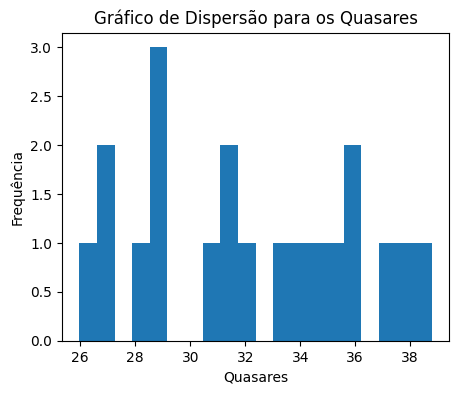

In [ ]:
quasares = dados['quasars']

# adquirindo a média e o desvio padrão
media_original = quasares.mean()
desvio_original = quasares.std()

print(f'''média original = {media_original}
desvio original = {desvio_original}
''')

#plotando
plt.figure(figsize=(5, 4))
plt.hist(quasares, bins = 20)
plt.xlabel('Quasares')
plt.ylabel('Frequência')
plt.title('Gráfico de Dispersão para os Quasares')
plt.show()

In [ ]:
#definindo uma função para o bootstrap e para a plotagem, achei mais fácil deixar tudo junto

def bootstrap(dados, N):
  means = []
  sigmas = []

  for i in range(N):
      btstp = dados.sample(len(dados), replace=True)
      bt_means = btstp.mean()
      means.append(bt_means)
      bt_sigmas = btstp.std()
      sigmas.append(bt_sigmas)

  #definindo as variáveis:
  media_bt = np.array(means)
  desvio_bt = np.array(sigmas)

  #plotando:
  plt.figure(figsize=(10, 3))
  plt.subplot(1, 2, 1)
  plt.hist(media_bt, bins=30, color = 'purple', edgecolor='black')
  plt.title(f'Média de N = {N}')
  #desvio
  plt.subplot(1, 2, 2)
  plt.hist(desvio_bt, bins=30, color = 'red', edgecolor='black')
  plt.title(f'Desvio padrão de N = {N}')
  plt.show()

  #calculando a média e o desvio padrão para os arrays do plot:
  media_geral = np.mean(media_bt)
  desvio_geral = np.std(desvio_bt)
  return media_geral, desvio_geral

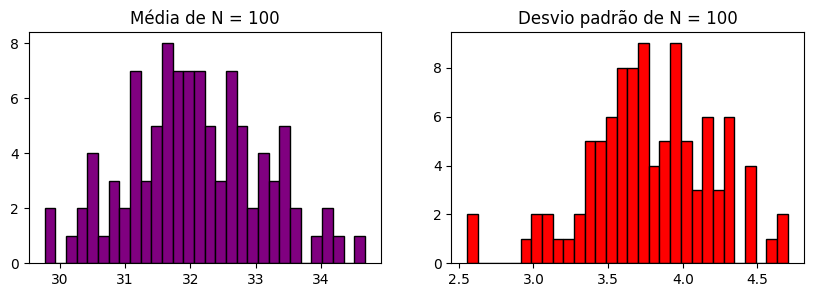


media = 32.06909
desvio = 0.41431845648282156      


In [ ]:
mean100, sigma100 = bootstrap(quasares, 100)
print(f'''
media = {mean100}
desvio = {sigma100}      ''')

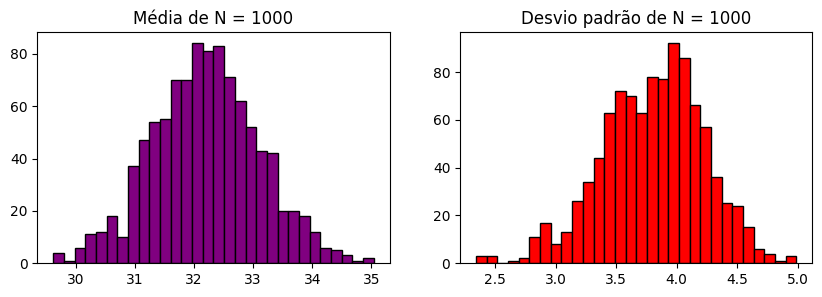


media = 32.201051
desvio = 0.42033345144339385 


In [ ]:
mean1000, sigma1000 = bootstrap(quasares, 1000)
print(f'''
media = {mean1000}
desvio = {sigma1000} ''')

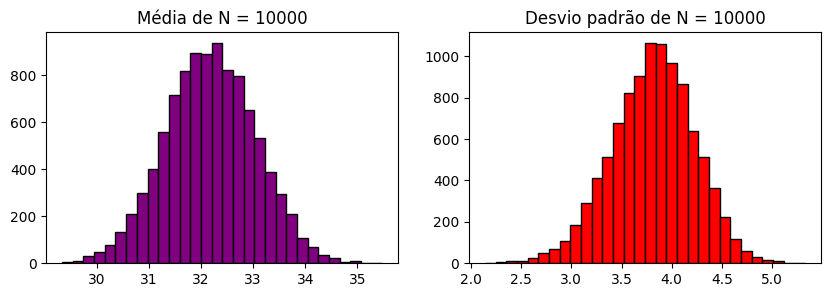


media = 32.18120305
desvio = 0.41194140555672093 


In [ ]:
mean10000, sigma10000 = bootstrap(quasares, 10000)
print(f'''
media = {mean10000}
desvio = {sigma10000} ''')

Analisando os três plots acima e os resultados para média e desvio padrão, pode-se concluir que conforme N aumenta a distribuição se torna cada vez mais próxima de uma distribuição normal, o que é previsto pelo teorema do limite central assim como na questão 1. A média dos "resamplings" ficou bastante próxima da média original, o qie faz sentido porque o bootstrap usa a mesma amostra para fazer as reamostragens, estranho seria se a média variasse da original. Já o desvio ficou relativamente próximo entre as três, mas bem diferente do original. Imagino que seja devido à quantidade de amostras.

### **5. Consider a catalogue of AGN selected in the optical region. We are looking for the fraction of them that produces non-thermal emissions, so we can define in our problem:**
 • Random variable (radio-loud): X. If true X = 1, else X = 0.
 • Parameter: θ. Radio − loud = θ1, radio − quiet = θ2.

(a) By assuming

• Priors: Π(θ1) = 0.2, Π(θ2) = 0.8

• Likelihood: L(X = 1|θ1) = 0.8,L(X = 1|θ2) = 0.3

Compute P(θ = θ1|X = 1).

(b) By assuming

• Priors: Π(θ1) = 0.1, Π(θ2) = 0.9

• Likelihood: L(X = 1|θ1) = 0.05,L(X = 1|θ2) = 0.3

Compute P(θ = θ2|X = 1).

## ***RESOLUÇÃO:***

Pelo teorema de Bayes:
**p(θ|X) = (L(X|θ) P(θ)) / E(X)**

onde:
**E(X)=Σj L(X|θj) P(θj)**

In [ ]:
def bayes(x, theta, prior_1, prior_2, veros_1, veros_2):
  #Random variable (radio-loud): X. If true X = 1, else X = 0.
  if x == 1:
    if theta == 1:
      p = veros_1*prior_1 / (veros_1*prior_1 + veros_2*prior_2)
    elif theta == 2:
      p = veros_2*prior_2 / (veros_1*prior_1 + veros_2*prior_2)
    else:
      p = 0
  else:
    p = 0
  return print(f'p = {p}')

In [ ]:
# a)
#Priors: Π(θ1) = 0.2, Π(θ2) = 0.8
#Likelihood: L(X = 1|θ1) = 0.8, L(X = 1|θ2) = 0.3

bayes(1, 1, 0.2, 0.8, 0.8, 0.3)

p = 0.4000000000000001


In [ ]:
# b)
#Priors: Π(θ1) = 0.1, Π(θ2) = 0.9
#Likelihood: L(X = 1|θ1) = 0.05,L(X = 1|θ2) = 0.3

bayes(1, 2, 0.1, 0.9, 0.05, 0.3)

p = 0.9818181818181818
